In [1]:
import pandas as pd
# Load Titanic dataset
titanic_df = pd.read_csv("titanic.csv")
# Inspect dataset
print(titanic_df.info())
print(titanic_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.48162

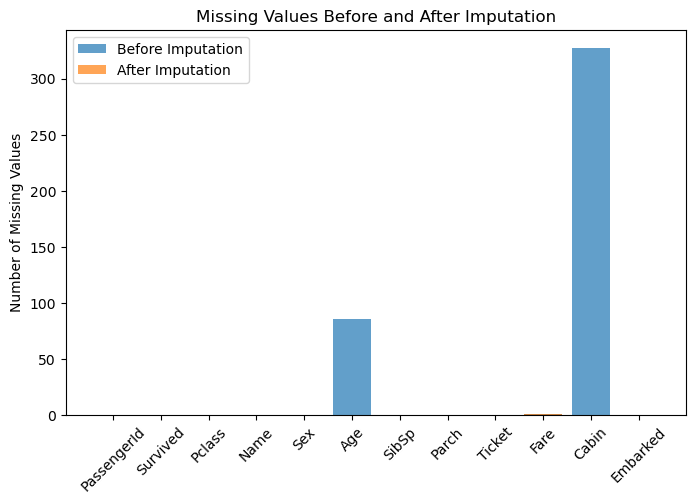

In [3]:
import matplotlib.pyplot as plt

# Missing values before and after imputation
missing_before = titanic_df.isnull().sum()
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')
missing_after = titanic_df.isnull().sum()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(missing_before.index, missing_before.values, label='Before Imputation', alpha=0.7)
ax.bar(missing_after.index, missing_after.values, label='After Imputation', alpha=0.7)
ax.set_ylabel('Number of Missing Values')
ax.set_title('Missing Values Before and After Imputation')
ax.legend()
plt.xticks(rotation=45)
plt.show()


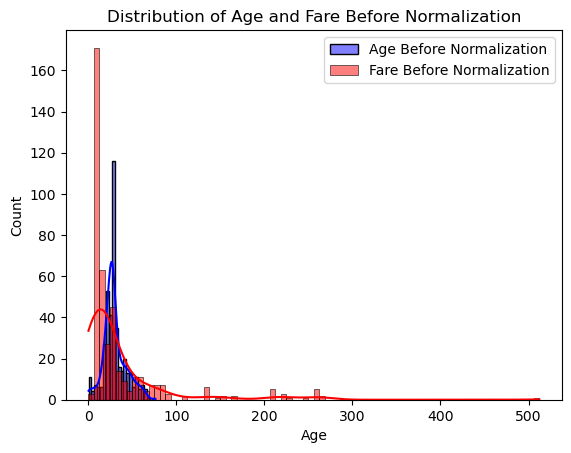

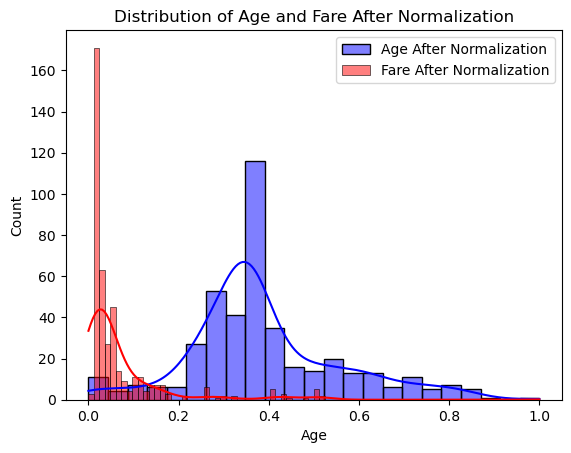

In [5]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Before normalization
sns.histplot(titanic_df['Age'], kde=True, color='blue', label='Age Before Normalization')
sns.histplot(titanic_df['Fare'], kde=True, color='red', label='Fare Before Normalization')
plt.legend()
plt.title('Distribution of Age and Fare Before Normalization')
plt.show()

# Apply normalization
scaler = MinMaxScaler()
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])

# After normalization
sns.histplot(titanic_df['Age'], kde=True, color='blue', label='Age After Normalization')
sns.histplot(titanic_df['Fare'], kde=True, color='red', label='Fare After Normalization')
plt.legend()
plt.title('Distribution of Age and Fare After Normalization')
plt.show()


In [14]:
import pandas as pd

# Assuming you have already loaded the Titanic dataset as 'df'
# Replace with your dataset loading code if necessary
# df = pd.read_csv('titanic.csv')

# 1. Encode 'Sex' column
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 2. Manually encode 'Embarked' column into 'Embarked_C' and 'Embarked_Q'
df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)

# Display the new encoded columns (first 5 rows)
encoded_table = df[['Sex', 'Embarked_C', 'Embarked_Q']].head()

# Display the table
import IPython.display as display
display.display(encoded_table)



,Sex,Embarked_C,Embarked_Q
0,1,0,1
1,0,0,0
2,1,0,1
3,1,0,0
4,0,0,0
